In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dCV = pd.read_csv('full_data.csv').fillna(0)
dCV.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [55]:
def groupby_column(df, column):
    gb_obj = df.groupby(column)
    gb_datadict = {key: gb_obj.get_group(key) for key in gb_obj.groups}
    return gb_datadict

def add_days(df_dict):
    days = []
    for key in df_dict.keys():
        df_dict[key]['day'] = [ i for i in range(1, df_dict[key].shape[0]+1)]
    return df_dict

def add_log(df_dict, column):
    days = []
    for key in df_dict.keys():
        df_dict[key]['log_'+ str(column)] = np.log(df_dict[key][column])
    return df_dict


In [56]:
dCV_loc_dict = groupby_column(dCV, 'location')
print(dCV_loc_dict['Italy'].shape[0])
dCV_country = add_days(dCV_loc_dict)  
dCV_country['India'].head()

42


<ipython-input-55-2e51b59edf7d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict[key]['day'] = [ i for i in range(1, df_dict[key].shape[0]+1)]


,date,location,new_cases,new_deaths,total_cases,total_deaths,day
754,2020-01-30,India,0.0,0.0,1,0.0,1
755,2020-01-31,India,0.0,0.0,1,0.0,2
756,2020-02-01,India,0.0,0.0,1,0.0,3
757,2020-02-02,India,1.0,0.0,2,0.0,4
758,2020-02-03,India,1.0,0.0,3,0.0,5


In [57]:
dCV_country = add_log(dCV_country, 'total_cases')
dCV_country = add_log(dCV_country, 'day')
dCV_country['India'].head()

<ipython-input-55-2e51b59edf7d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dict[key]['log_'+ str(column)] = np.log(df_dict[key][column])


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,log_total_cases,log_day
754,2020-01-30,India,0.0,0.0,1,0.0,1,0.000000,0.000000
755,2020-01-31,India,0.0,0.0,1,0.0,2,0.000000,0.693147
756,2020-02-01,India,0.0,0.0,1,0.0,3,0.000000,1.098612
757,2020-02-02,India,1.0,0.0,2,0.0,4,0.693147,1.386294
758,2020-02-03,India,1.0,0.0,3,0.0,5,1.098612,1.609438


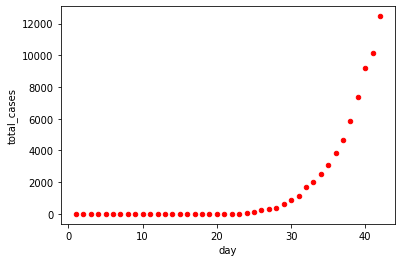

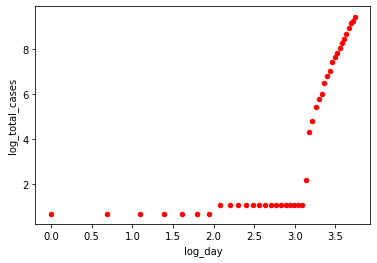

In [58]:
dCV_country['Italy'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['Italy'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()

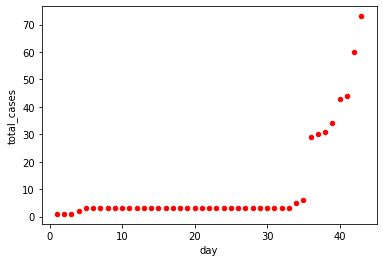

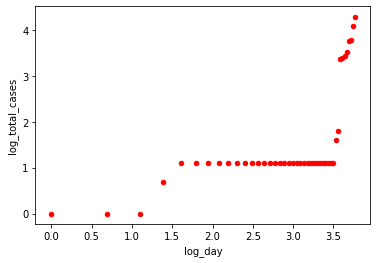

In [59]:
dCV_country['India'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['India'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()


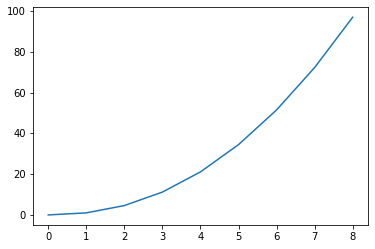

In [42]:
## model the rate of growth
from scipy.stats import powerlaw
import math
x  = range(20,29)
y = np.array(np.power(x, 2.2))
plt.plot(x,y)